In [29]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Basic Usage

In [2]:
X, y = make_regression(n_features=4,
                       n_informative=2,
                       random_state=0,
                       shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)

Text(0, 0.5, 'Feature Importance')

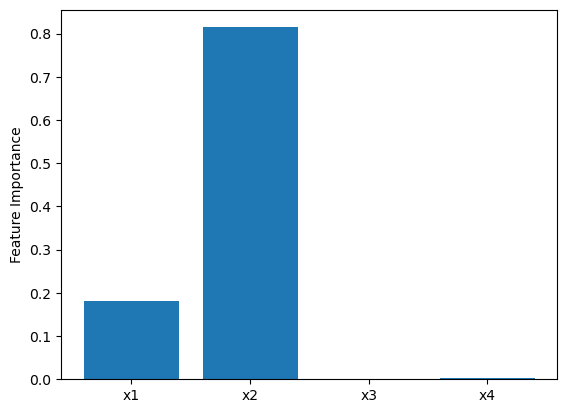

In [3]:
plt.bar(['x1', 'x2', 'x3', 'x4'], regr.feature_importances_)
plt.ylabel('Feature Importance')

# Cautions

## Noise matter

In [4]:
X_noise = X.copy()
X_noise[:, 1] = X_noise[:, 1] + np.random.normal(0, 2, X_noise.shape[0])

In [5]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_noise, y)

RandomForestRegressor(max_depth=2, random_state=0)

Text(0, 0.5, 'Feature Importance')

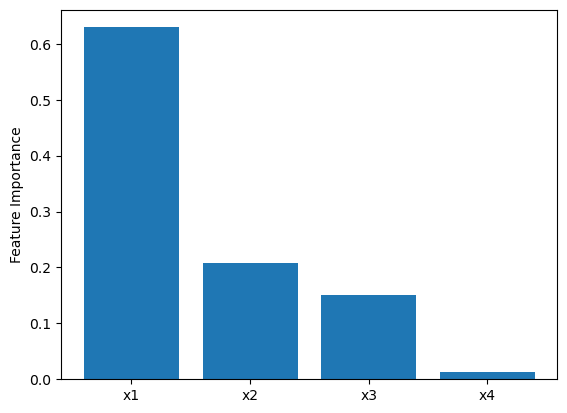

In [6]:
plt.bar(['x1', 'x2', 'x3', 'x4'], regr.feature_importances_)
plt.ylabel('Feature Importance')

## Random is random

In [15]:
X, y = make_regression(n_features=4,
                       n_informative=2,
                       random_state=0,
                       shuffle=False,
                       n_samples=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regr = RandomForestRegressor(max_depth=2)
regr.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regr = RandomForestRegressor(max_depth=2)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2)

Text(0, 0.5, 'Feature Importance')

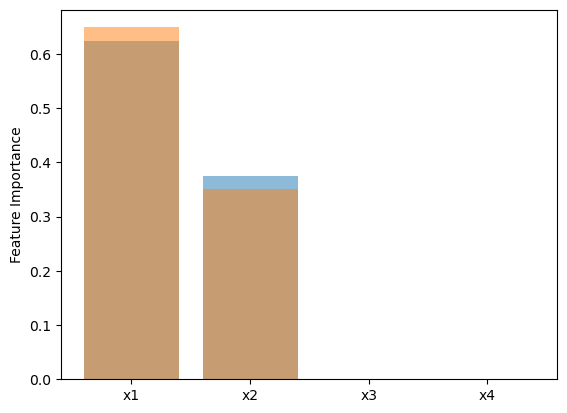

In [16]:
plt.bar(['x1', 'x2', 'x3', 'x4'], regr.feature_importances_, alpha=0.5)
plt.bar(['x1', 'x2', 'x3', 'x4'], regr.feature_importances_, alpha=0.5)
plt.ylabel('Feature Importance')

## Bad is bad

In [17]:
X, y = make_regression(n_features=10,
                       n_informative=3,
                       random_state=0,
                       shuffle=False,
                       n_samples=1000)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regr = RandomForestRegressor(max_depth=1)
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.48826065680085184
0.9781637909734316


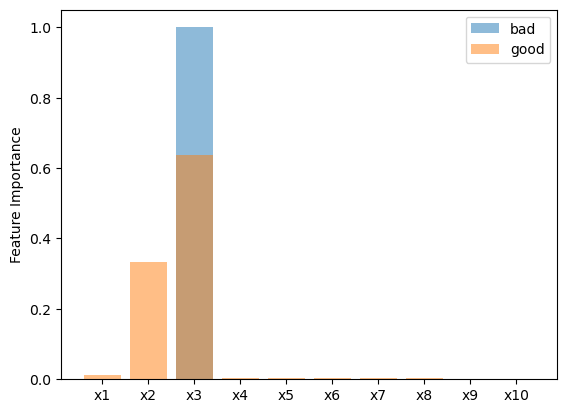

In [27]:
plt.bar([f'x{i}' for i in range(1, 11)], regr.feature_importances_, alpha=0.5, label='bad')
plt.bar([f'x{i}' for i in range(1, 11)], regr.feature_importances_, alpha=0.5, label='good')
plt.ylabel('Feature Importance')
plt.legend()

## 山中无老虎，猴子称大王

When the cat's away, the mice will play.

In [78]:
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(0, 1, 1000)
x3 = np.random.normal(0, 1, 1000)
y = 0.7 * x1 + 0.5 * x2 + 0.9 * x3 + np.random.normal(0, 0.3, 1000)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(np.c_[x1, x2], y, test_size=0.2)

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(np.c_[x1, x2, x3], y, test_size=0.2)

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.39406370156832493
0.9036737615677389


<BarContainer object of 3 artists>

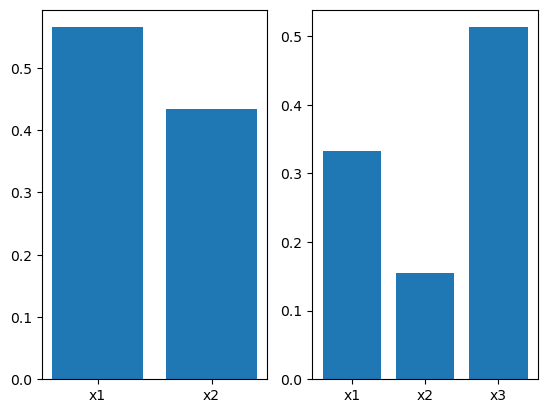

In [81]:
plt.subplot(121)
plt.bar(['x1', 'x2'], regr.feature_importances_)
plt.subplot(122)
plt.bar(['x1', 'x2', 'x3'], regr.feature_importances_)

## Indirect correlation matter

In [100]:
x1 = np.random.normal(0, 1, 1000)
x2 = x1 ** 2 + np.random.normal(0, 0.1, 1000)
x3 = 2 * x1 + np.random.normal(0, 0.1, 1000)
y = 0.3 * x2 + 0.6 * x3 + np.random.normal(0, 0.3, 1000)

In [103]:
all_importance = []
all_score = []

for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(np.c_[x1, x2, x3], y, test_size=0.2)

    regr = RandomForestRegressor()
    regr.fit(X_train, y_train)

    all_importance.append(regr.feature_importances_)
    all_score.append(regr.score(X_test, y_test))

In [104]:
np.mean(all_score)

0.9285636386279976

In [106]:
np.mean(all_importance, axis=0)

array([0.44750145, 0.06680695, 0.4856916 ])

<ErrorbarContainer object of 3 artists>

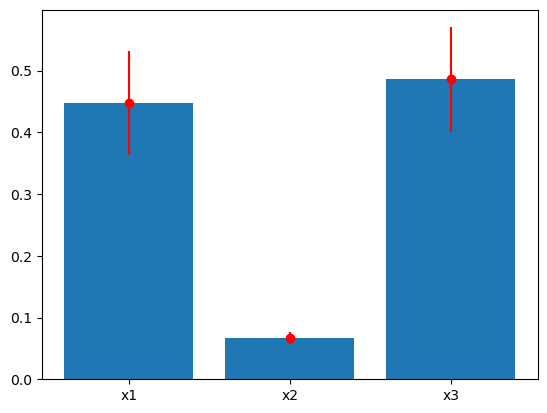

In [108]:
plt.bar(['x1', 'x2', 'x3'], np.mean(all_importance, axis=0))
# errorbar
plt.errorbar(['x1', 'x2', 'x3'], np.mean(all_importance, axis=0), np.std(all_importance, axis=0), fmt='o', color='red')

## Feature hates feature

In [139]:
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.normal(0, 1, 1000)
x3 = np.random.normal(0, 1, 1000)
y = x1 + x2 + x3 + np.random.normal(0, 0.3, 1000)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(np.c_[x1, x2, x3, x1 * x2,
                                                          x1 / x2],
                                                    y,
                                                    test_size=0.2)

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.924941862431489


<BarContainer object of 5 artists>

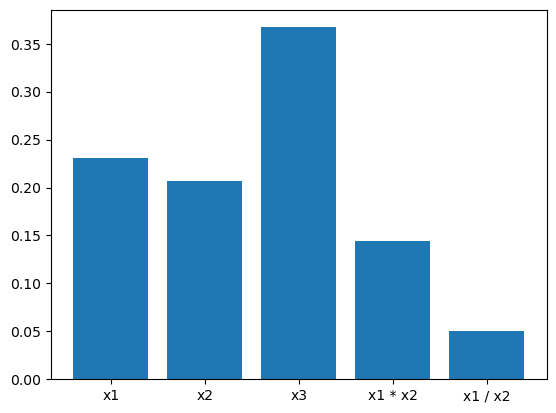

In [141]:
plt.bar(['x1', 'x2', 'x3', 'x1 * x2', 'x1 / x2'],
        regr.feature_importances_)

## Feature helps feature

In [195]:
x1 = np.random.uniform(0, 1, 10000)
x2 = np.random.uniform(0, 1, 10000)
x3 = np.random.normal(0, 1, 10000)
x4 = np.random.normal(0, 1, 10000)
y = (np.sign(x1 - 0.5) * np.sign(x2 - 0.5)) + x3 + 0.1 * x4 + np.random.normal(0, 0.1, 10000)

Text(0, 0.5, 'x2')

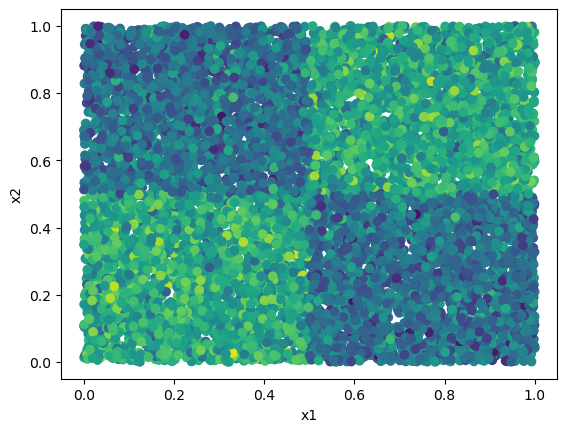

In [196]:
plt.scatter(x1, x2, c=y)
plt.xlabel('x1')
plt.ylabel('x2')

In [197]:
X_train, X_test, y_train, y_test = train_test_split(np.c_[x1, x2, x3, x4],
                                                    y,
                                                    test_size=0.2)

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(np.c_[x1, x3, x4],
                                                    y,
                                                    test_size=0.2)
regr1 = RandomForestRegressor()
regr1.fit(X_train, y_train)
print(regr1.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(np.c_[x2, x3, x4],
                                                    y,
                                                    test_size=0.2)
regr2 = RandomForestRegressor()
regr2.fit(X_train, y_train)
print(regr2.score(X_test, y_test))

0.9738305438731168
0.42197092072442055
0.4379074484398574


<BarContainer object of 3 artists>

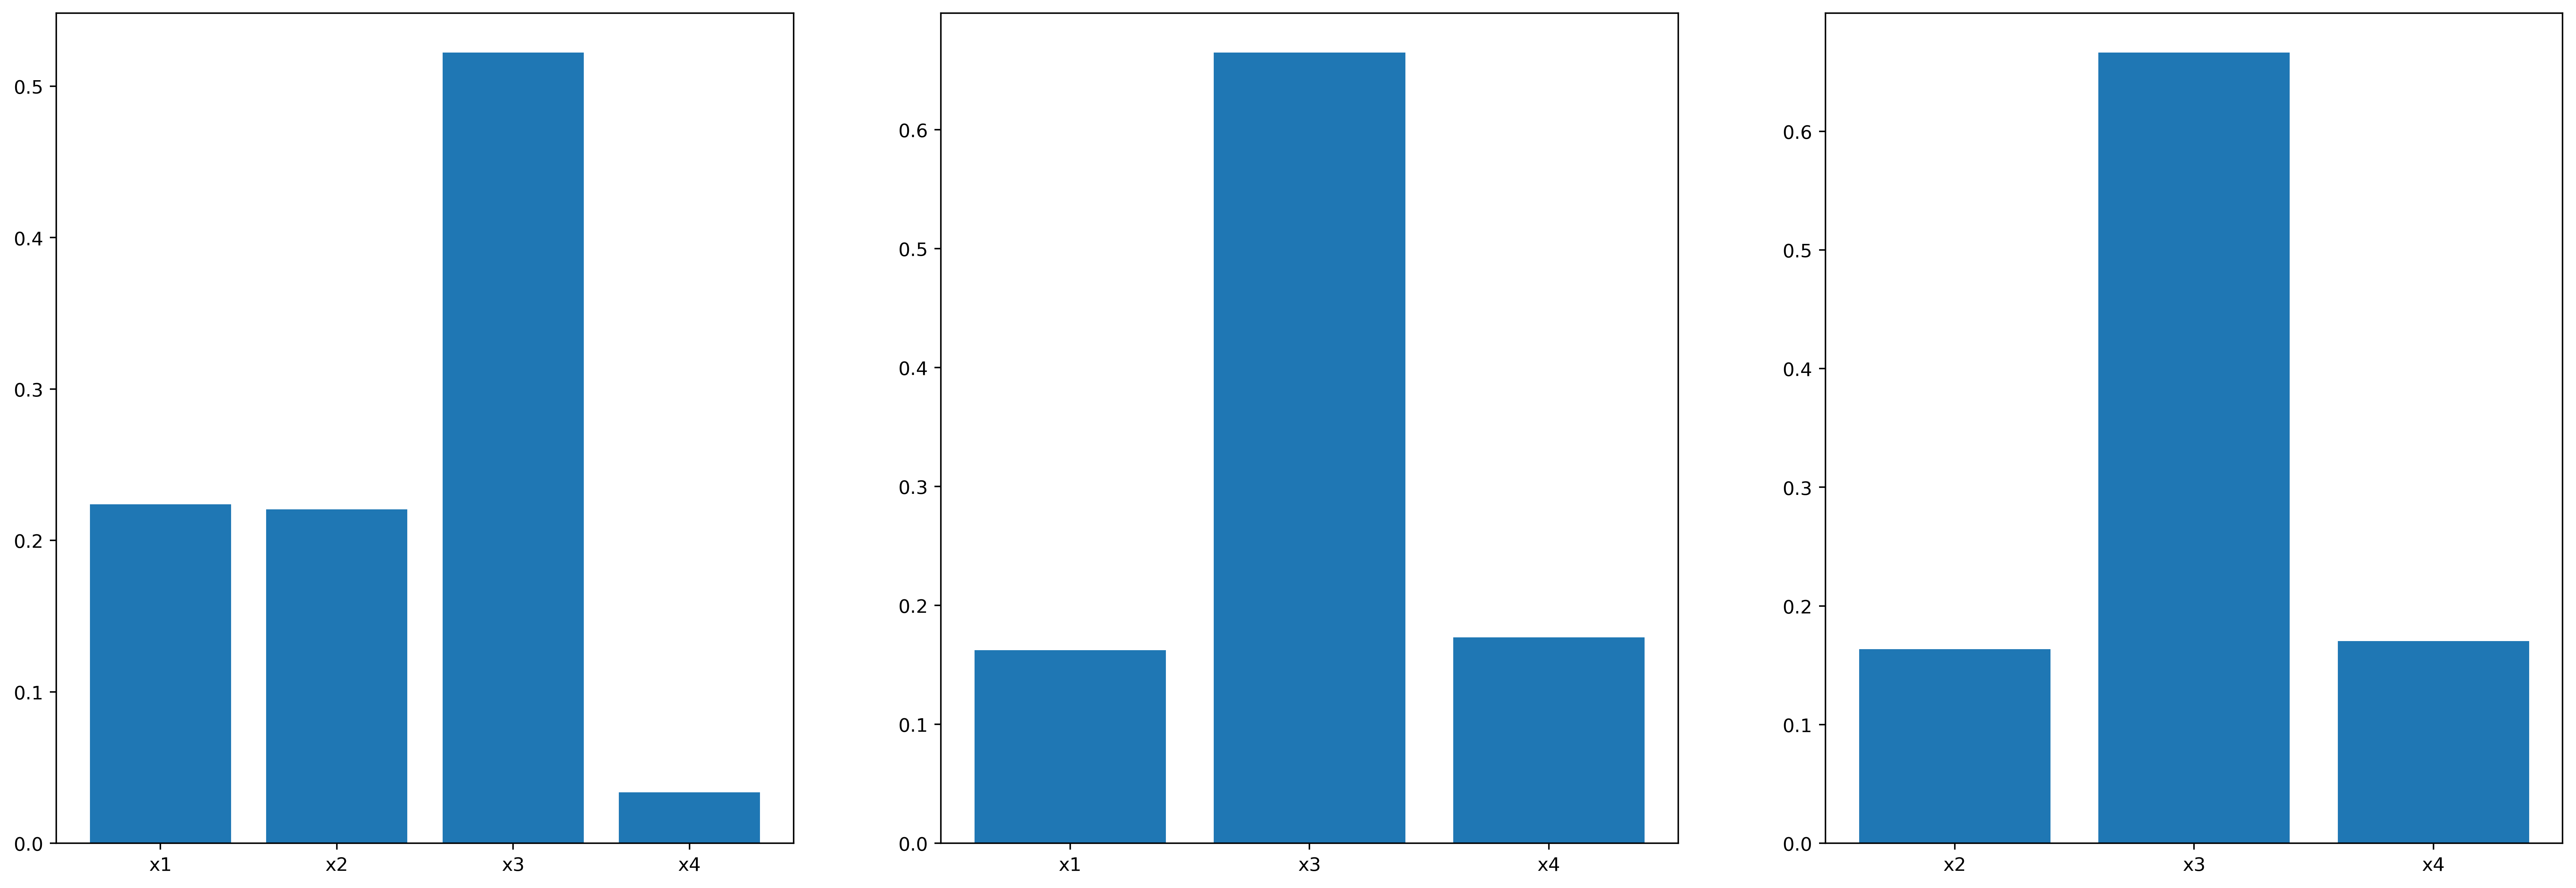

In [198]:
plt.figure(figsize=(24, 8), dpi=400)

plt.subplot(131)
plt.bar(['x1', 'x2', 'x3', 'x4'], regr.feature_importances_)
plt.subplot(132)
plt.bar(['x1', 'x3', 'x4'], regr1.feature_importances_)
plt.subplot(133)
plt.bar(['x2', 'x3', 'x4'], regr2.feature_importances_)

# Tricks

## `scikit-learn-intelex` is good

In [36]:
from sklearnex.ensemble import RandomForestRegressor as RandomForestRegressor_ex

In [31]:
X = np.random.normal(0, 1, (1000, 200))
y = X @ np.random.uniform(0, 1, 200) + np.random.normal(0, 0.1, 1000)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
rf = RandomForestRegressor(max_depth=31)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.16914704388552748


In [37]:
rf_ex = RandomForestRegressor_ex(max_depth=31)
rf_ex.fit(X_train, y_train)
print(rf_ex.score(X_test, y_test))

0.17876048160014735


## Random feature as a reference

In [41]:
X, y = make_regression(n_features=10,
                       n_informative=5,
                       random_state=0,
                       shuffle=False,
                       n_samples=1000)

In [42]:
all_importance = []
all_score = []

for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    regr = RandomForestRegressor_ex()
    regr.fit(X_train, y_train)

    all_importance.append(regr.feature_importances_)
    all_score.append(regr.score(X_test, y_test))

<ErrorbarContainer object of 3 artists>

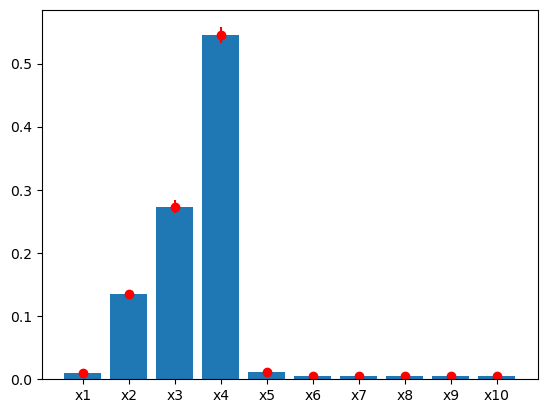

In [43]:
plt.bar([f'x{i}' for i in range(1, 11)], np.mean(all_importance, axis=0))
# errorbar
plt.errorbar([f'x{i}' for i in range(1, 11)],
             np.mean(all_importance, axis=0),
             np.std(all_importance, axis=0),
             fmt='o',
             color='red')

In [44]:
all_importance = []
all_score = []

for _ in range(100):

    X_with_rnd = np.concatenate([X, np.random.normal(0, 1, (1000, 1))], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X_with_rnd,
                                                        y,
                                                        test_size=0.2)

    regr = RandomForestRegressor_ex()
    regr.fit(X_train, y_train)

    all_importance.append(regr.feature_importances_)
    all_score.append(regr.score(X_test, y_test))

In [47]:
np.mean(all_importance, axis=0).size

11

(0.0, 0.02)

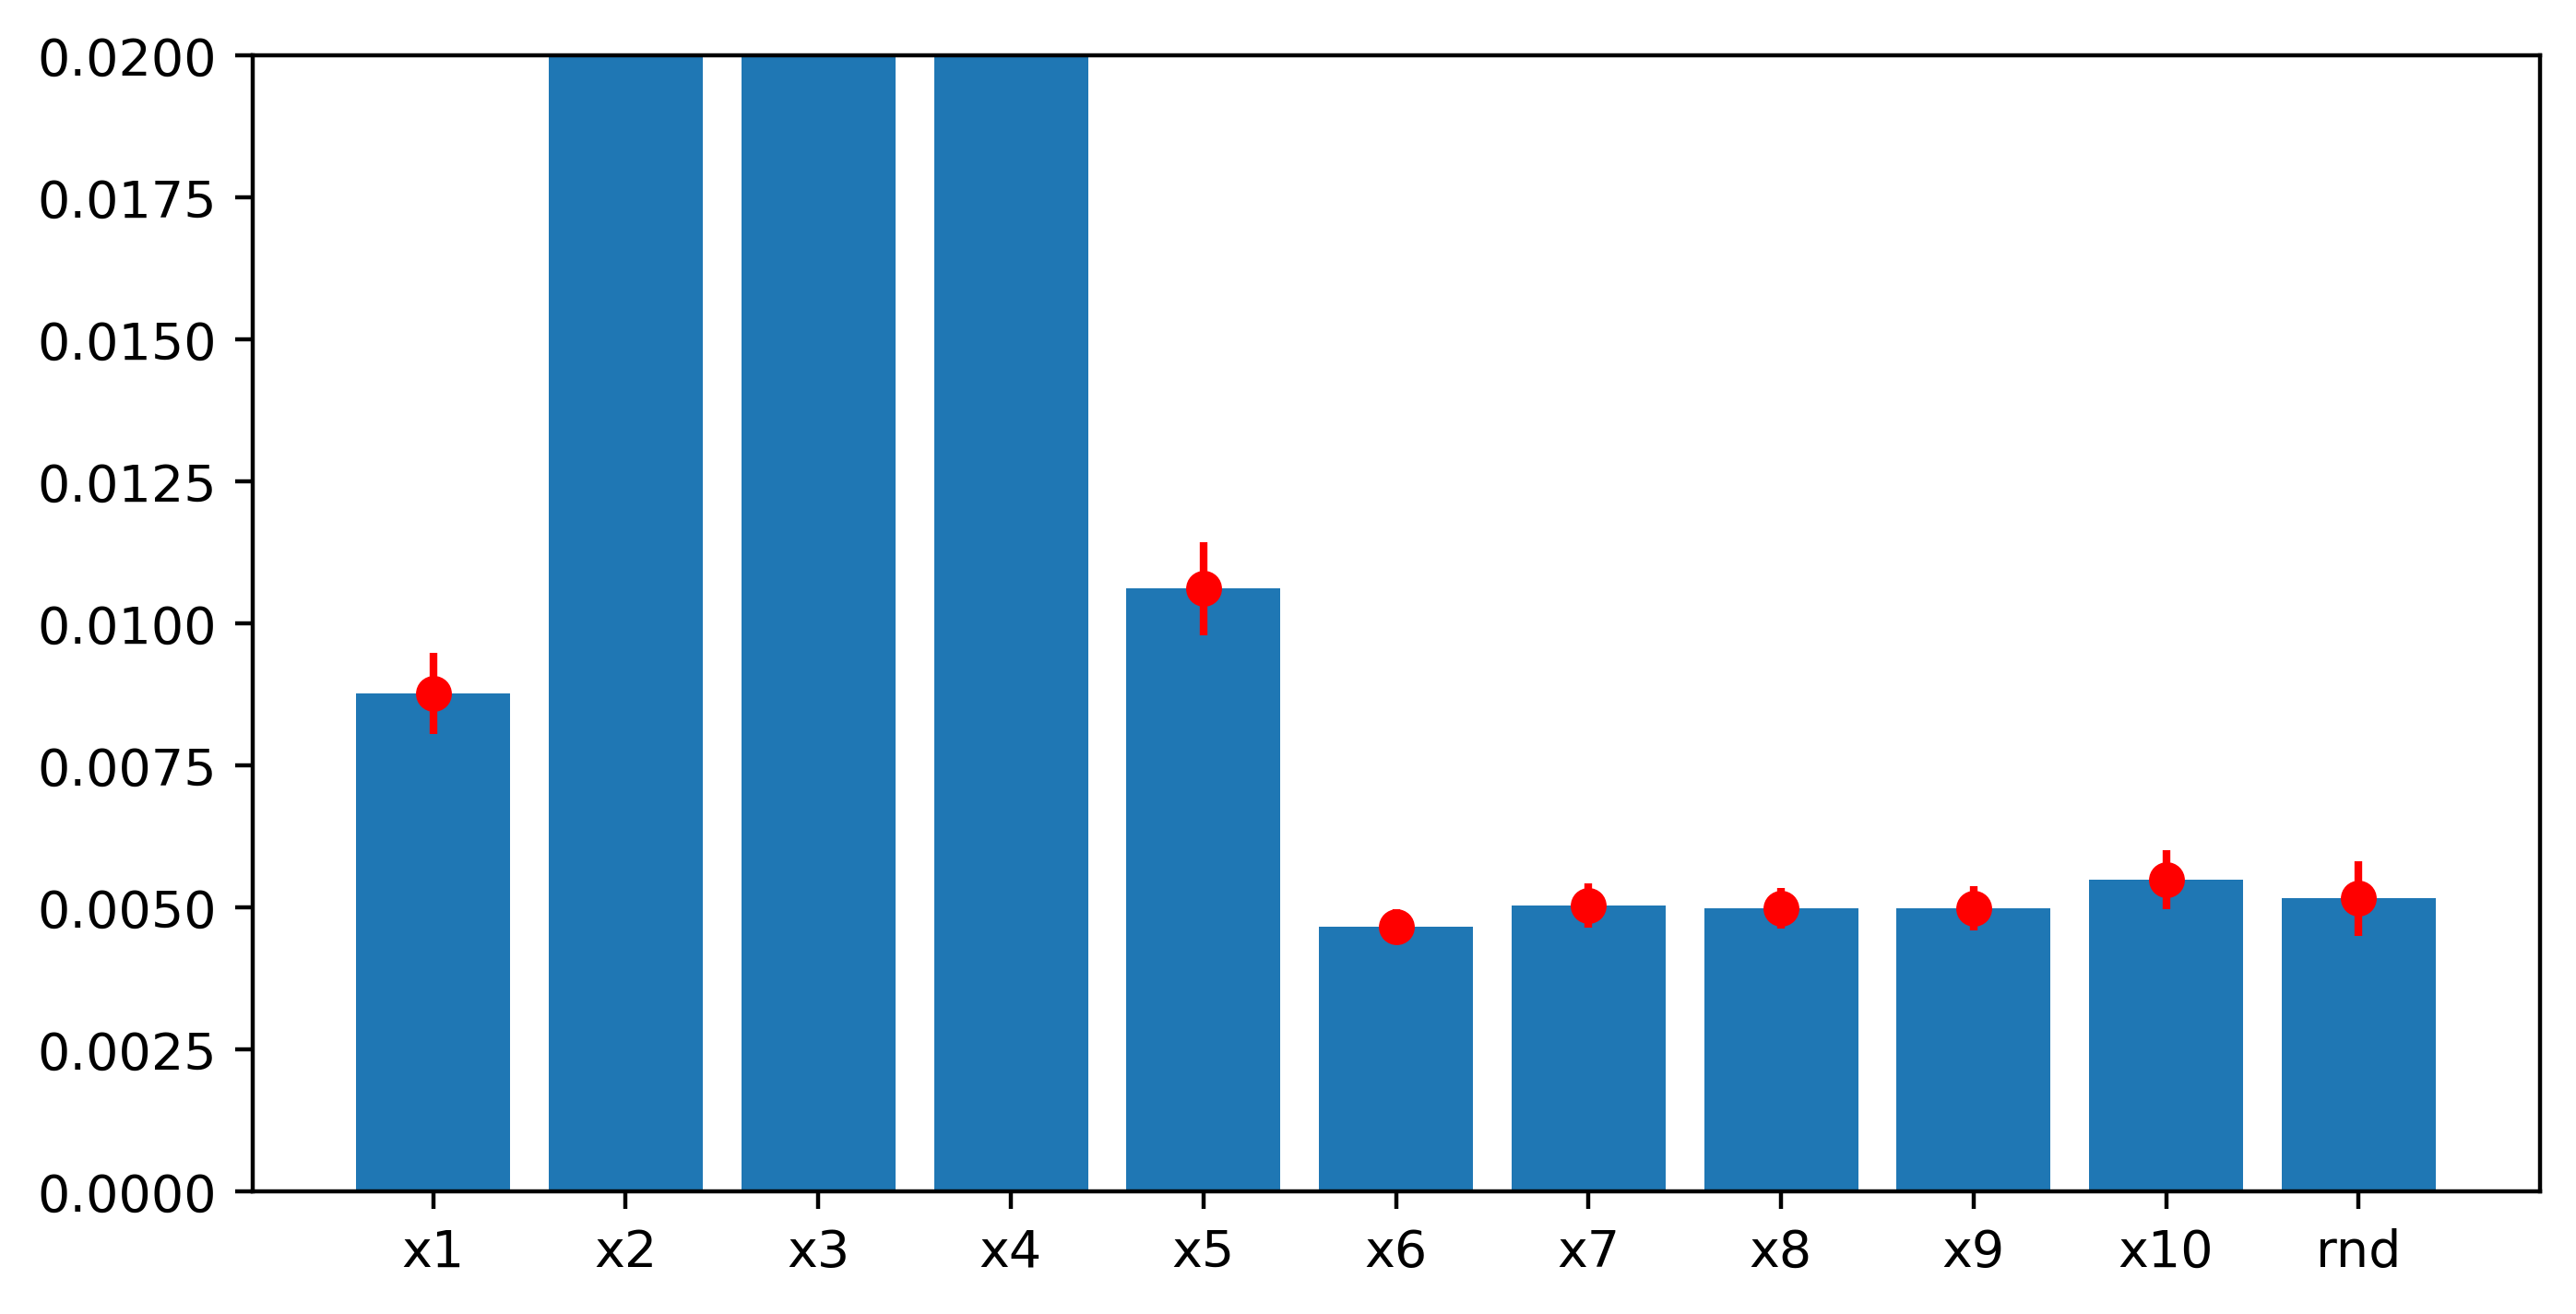

In [52]:
plt.figure(figsize=(8, 4), dpi=400)
plt.bar([f'x{i}' for i in range(1, 11)] + ['rnd'],
        np.mean(all_importance, axis=0))
# errorbar
plt.errorbar([f'x{i}' for i in range(1, 11)] + ['rnd'],
             np.mean(all_importance, axis=0),
             np.std(all_importance, axis=0),
             fmt='o',
             color='red')
plt.ylim(0, 0.02)